In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
# nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle 
import re

In [8]:
data = pd.read_csv("amazon_alexa.tsv", delimiter='\t', quoting=3)
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
data['feedback'].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [10]:
data['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

In [14]:
print(data.columns.values)

['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [16]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [24]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [25]:
data.dropna(inplace = True)

In [26]:
len(data)

3149

In [27]:
data.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [31]:
data.rating.value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

In [30]:
data.head(1)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1


In [32]:
data["length"] = data["verified_reviews"].apply(len)

In [33]:
data.head(2)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9


In [36]:
print(f"10th row", data.iloc[10]['verified_reviews'])
print(f"10th row manual length", len(data.iloc[10]['verified_reviews']))
print(f"10th row length column values: ", data.iloc[10]['length'])

10th row "I sent it to my 85 year old Dad, and he talks to it constantly."
10th row manual length 65
10th row length column values:  65


In [38]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

Integer values - rating, feedback , length  
String values - verified_reviews, date, variation

In [39]:
len(data)

3149

In [41]:
data.shape

(3149, 6)

##### Analysing rating column

In [43]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [45]:
data['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

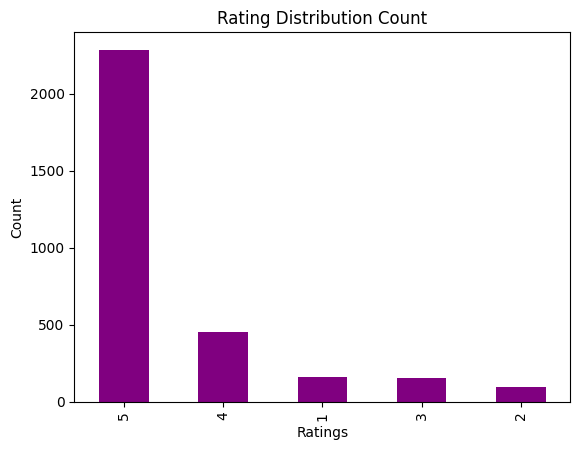

In [48]:
data['rating'].value_counts().plot.bar(color = 'purple')
plt.title("Rating Distribution Count")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [51]:
round(data['rating'].value_counts(normalize=True)*100, 2)

rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: proportion, dtype: float64

<Axes: ylabel='Percentage wise distribution of ratings'>

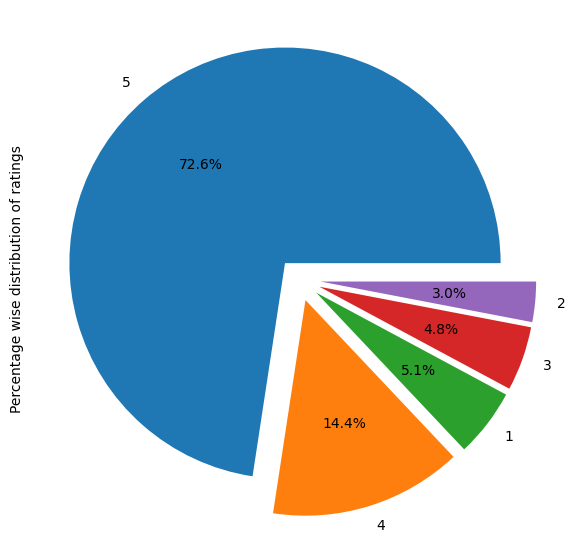

In [66]:
fig = plt.figure(figsize=(7,7))
tags = data['rating'].value_counts(normalize=True) * 100
explode = tuple([0.1])* 5
tags.plot(kind = 'pie', autopct = "%1.1f%%", explode=explode, label = "Percentage wise distribution of ratings")

In [67]:
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format = 'png')

Analysing 'feedback' column

In [ ]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

<Axes: xlabel='feedback'>

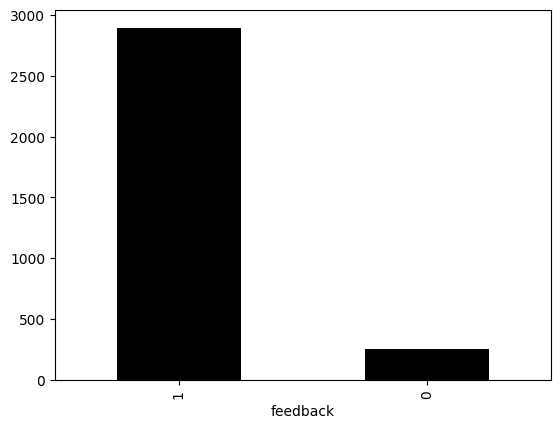

In [71]:
data['feedback'].value_counts().plot(kind = 'bar', color = 'black')